#### 0. Loading requirements

In [690]:
import datasets
import interpret.glassbox
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy as sp
from scraper import *
import seaborn as sns
import shap
import sklearn
from sklearn.preprocessing import OneHotEncoder
import xgboost

#### 1. Summary Statistics and Visualizations

Getting summary statistics for metric and categorical variables.

In [691]:
# Importing csv file with the data
data = pd.read_csv("Product_Table_complete.csv")

In [692]:
# Get dimension of the dataset
print(data.shape)

(1687, 48)


,count,mean,std,min,25%,50%,75%,max
rear cam resolution,1661.0,48.43,42.66,2.00,13.00,50.00,50.00,200.00
weight,1670.0,196.87,54.41,100.00,186.00,200.00,200.00,900.00
resolution total,1681.0,2342675.03,1159654.79,19200.00,1160640.00,2592000.00,2962440.00,6312960.00
resolution height,1681.0,1047.33,368.79,128.00,1080.00,1080.00,1179.00,3216.00
number of ratings,1687.0,12.97,45.92,0.00,0.00,1.00,7.00,775.00
length,1670.0,15.49,2.04,0.68,14.80,16.10,16.41,18.40
RAM,1277.0,7.04,3.16,1.00,4.00,8.00,8.00,16.00
price,1685.0,12140.03,11209.76,449.00,3499.00,6999.00,19429.00,53990.00
front cam resolution,1549.0,14.54,9.38,2.00,8.00,12.00,16.00,60.00
display size,1686.0,6.12,1.19,1.77,6.10,6.55,6.70,7.92


,Count,Share
DatArt,950,0.56313
Electroworld,737,0.43687
Total,1687,1.00000


,Count,Share
Apple,322,0.190871
Samsung,300,0.177830
Xiaomi,228,0.135151
Motorola,111,0.065797
Aligator,76,0.045050
Poco,67,0.039715
Infinix,48,0.028453
HONOR,45,0.026675
myPhone,38,0.022525
Honor,34,0.020154


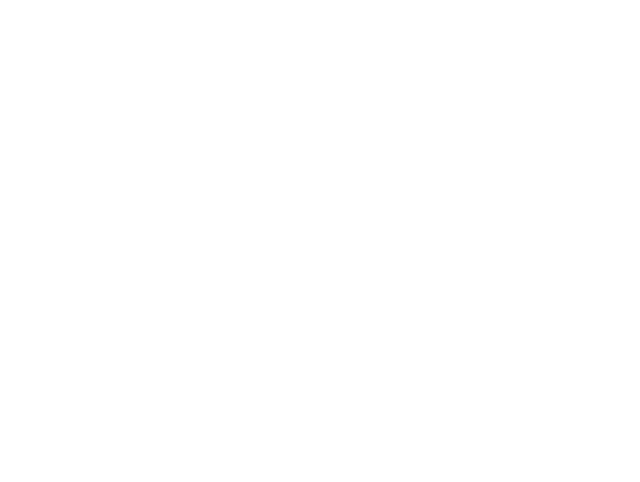

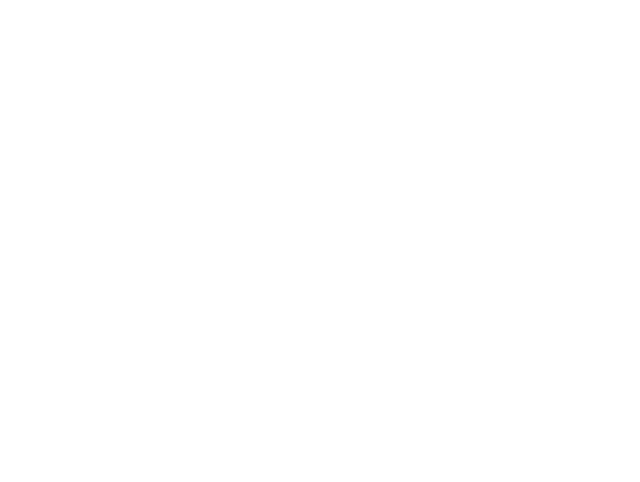

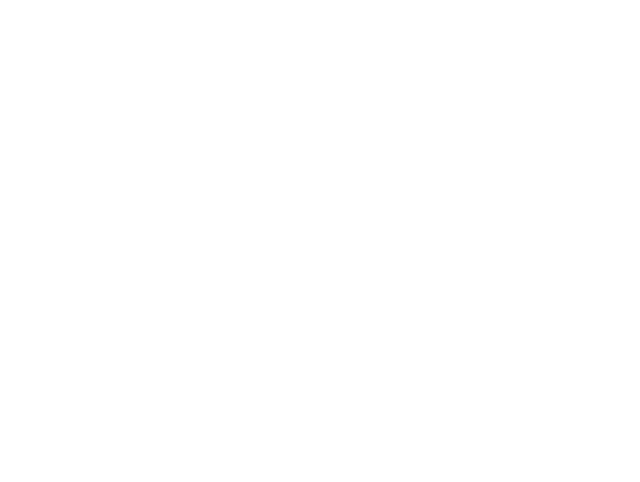

In [693]:
metric_variables = get_metric_variables(data)
categorical_variables = get_categorical_variables(data)
metric_variables_summary = get_metric_variables_summary(metric_variables)
categorical_variables_summary = get_categorical_variables_summary(categorical_variables)
# Correlation matrix for metric variables
correlation_matrix = metric_variables.corr()
display(metric_variables_summary)
# Plot the table
plt.figure(figsize=(8, 6))
# Remove axis
plt.axis('off')
# Save the table as a PNG file
plt.savefig('metric_variables_table.png', bbox_inches='tight', pad_inches=0.1)

display(categorical_variables_summary['online-retailer'])
plt.figure(figsize=(8, 6))
# Remove axis
plt.axis('off')
# Save the table as a PNG file
plt.savefig('online_retailer_table.png', bbox_inches='tight', pad_inches=0.1)

display(categorical_variables_summary['brand'])
plt.figure(figsize=(8, 6))
# Remove axis
plt.axis('off')
# Save the table as a PNG file
plt.savefig('brand_table.png', bbox_inches='tight', pad_inches=0.1)

Create one chart with statistics comparing the three retailers. Getting average price of products, number of products. Brand with number of products that is sold the most.

,Average price,Most supplied brand,Most supplied colour,Average product rating,Number of given ratings,Number of products
online-retailer,,,,,,
DatArt,12097.61,Apple,black,4.67,20058,950
Electroworld,12194.86,Apple,black,4.76,1816,737


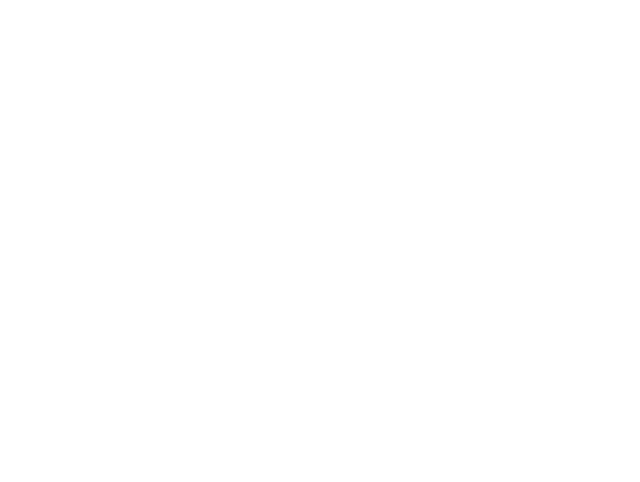

In [696]:
# Group by online-retailer and calculate average price and most supplied brands and colours
retailer_table = get_online_retailer_comparison_table(data)
display(retailer_table)
plt.figure(figsize=(8, 6))
# Remove axis
plt.axis('off')
# Save the table as a PNG file
plt.savefig('online_retailer_comp.png', bbox_inches='tight', pad_inches=0.1)

Creating some visualizations to analyze some variables.

Bar Plots

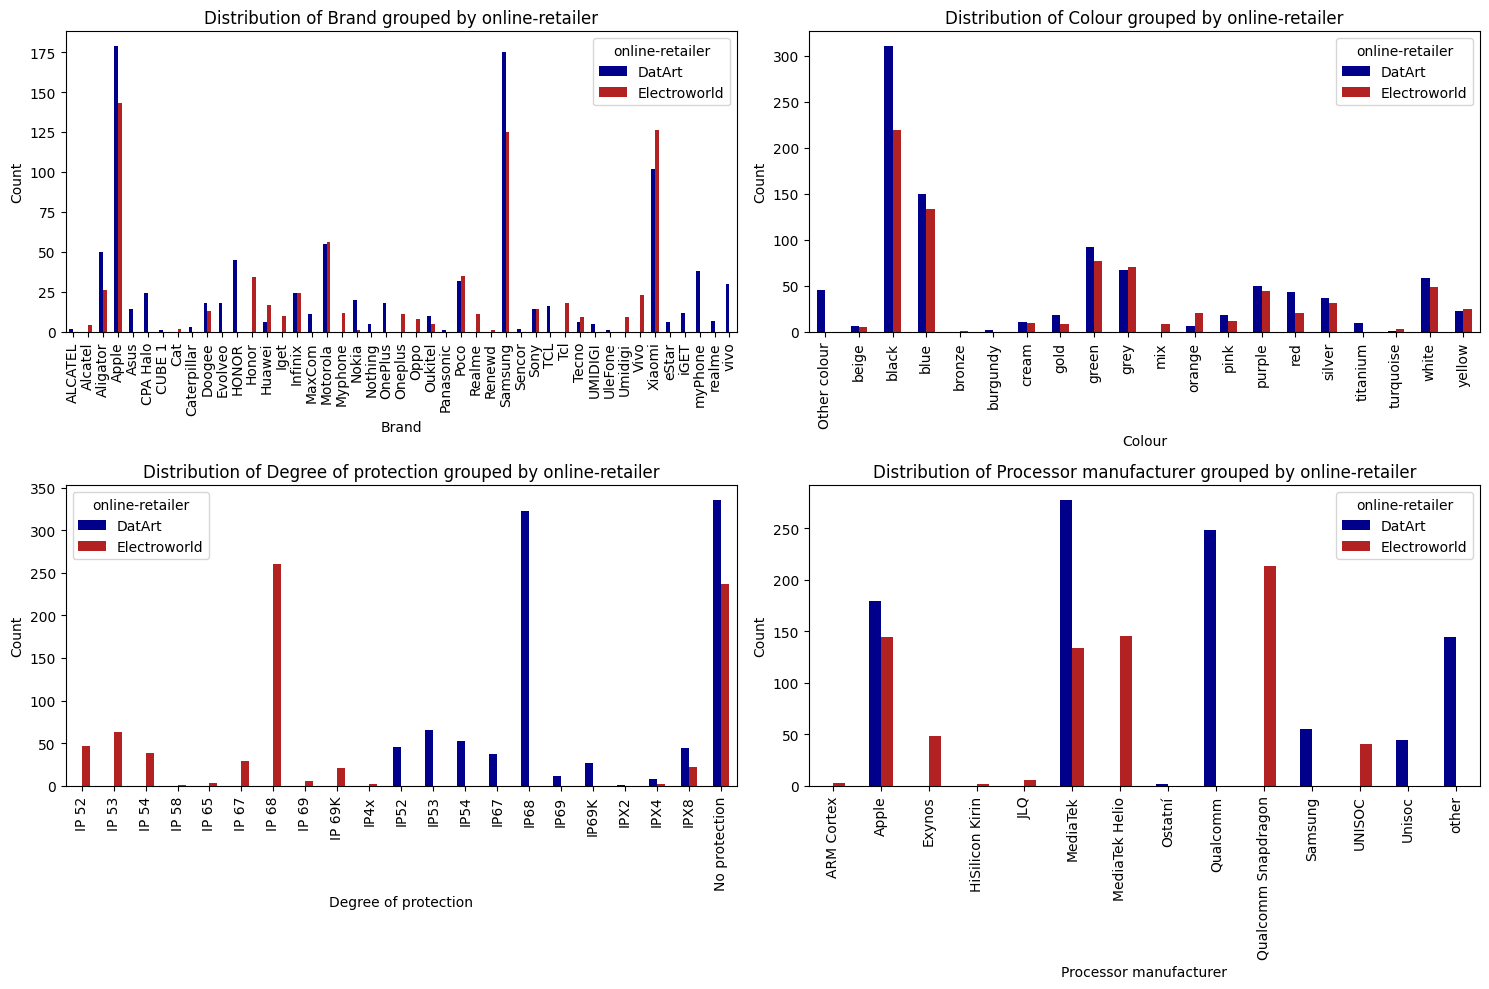

In [639]:
# List of variables to plot
variables_to_plot = ['brand', 'colour', 'degree of protection', 'processor manufacturer']
grouping_variable = 'online-retailer'  # Secondary variable for grouping

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Define colors for specific retailers
colors = {'Electroworld': 'firebrick', 'DatArt': 'darkblue'}

# Plot grouped bar chart for each variable
for idx, variable in enumerate(variables_to_plot):
    ax = axes[idx // 2, idx % 2]  # Get the current axis
    grouped_data = data.groupby([variable, grouping_variable]).size().unstack()

    # Plot the grouped bar charts
    grouped_data.plot(kind='bar', ax=ax, color=[colors.get(c, 'grey') for c in grouped_data.columns])
    ax.set_title(f'Distribution of {variable.capitalize()} grouped by {grouping_variable}')
    ax.set_xlabel(variable.capitalize())
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Saving plot in current wd in the "images" directory 
saving_plot("bar_plots_grouped.png")

plt.show()

Pie Plots

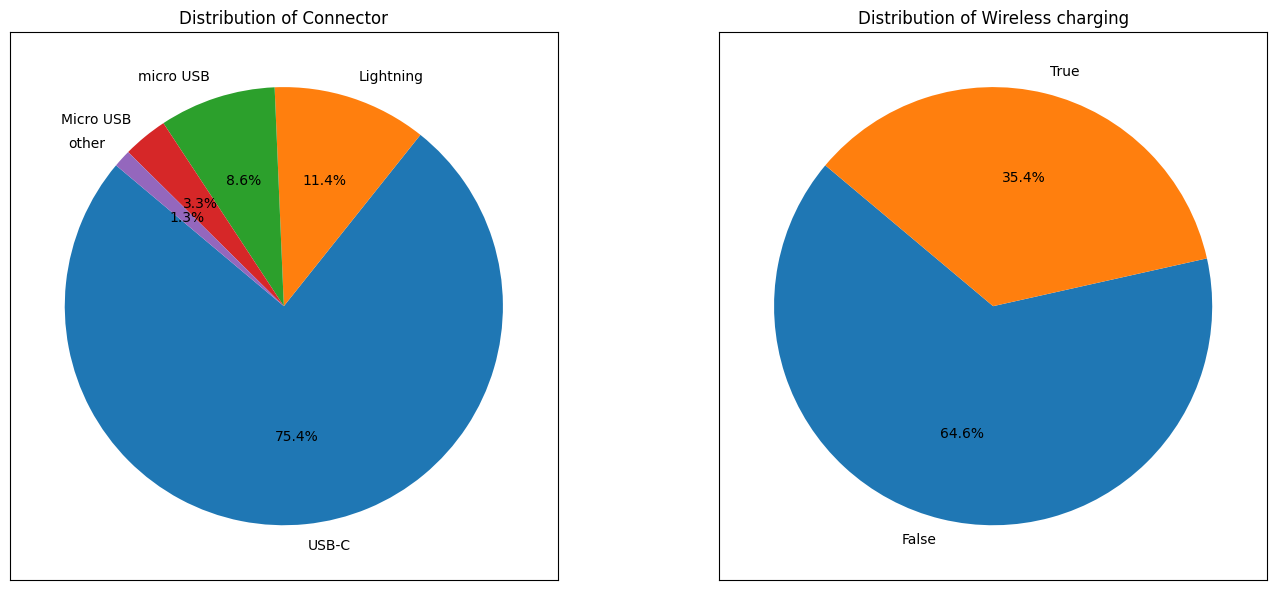

In [640]:
# List of variables to plot
variables_to_plot = ['connector', 'wireless charging']

# Set seaborn style and color palette
color_palette = sns.color_palette("tab10")

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot pie chart with percentages for each variable
for idx, variable in enumerate(variables_to_plot[:2]):  # Plot only the first two variables
    ax = axes[idx]  # Get the current axis
    category_counts = data[variable].value_counts()
    category_percentages = (category_counts / category_counts.sum()) * 100
    pie = category_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax, colors=color_palette)
    ax.set_title(f'Distribution of {variable.capitalize()}')
    ax.set_ylabel('')

    # Add frame
    ax.set_frame_on(True)

# Adjust layout
plt.tight_layout()

saving_plot("pie_plots.png")

plt.show()

Scatterplot

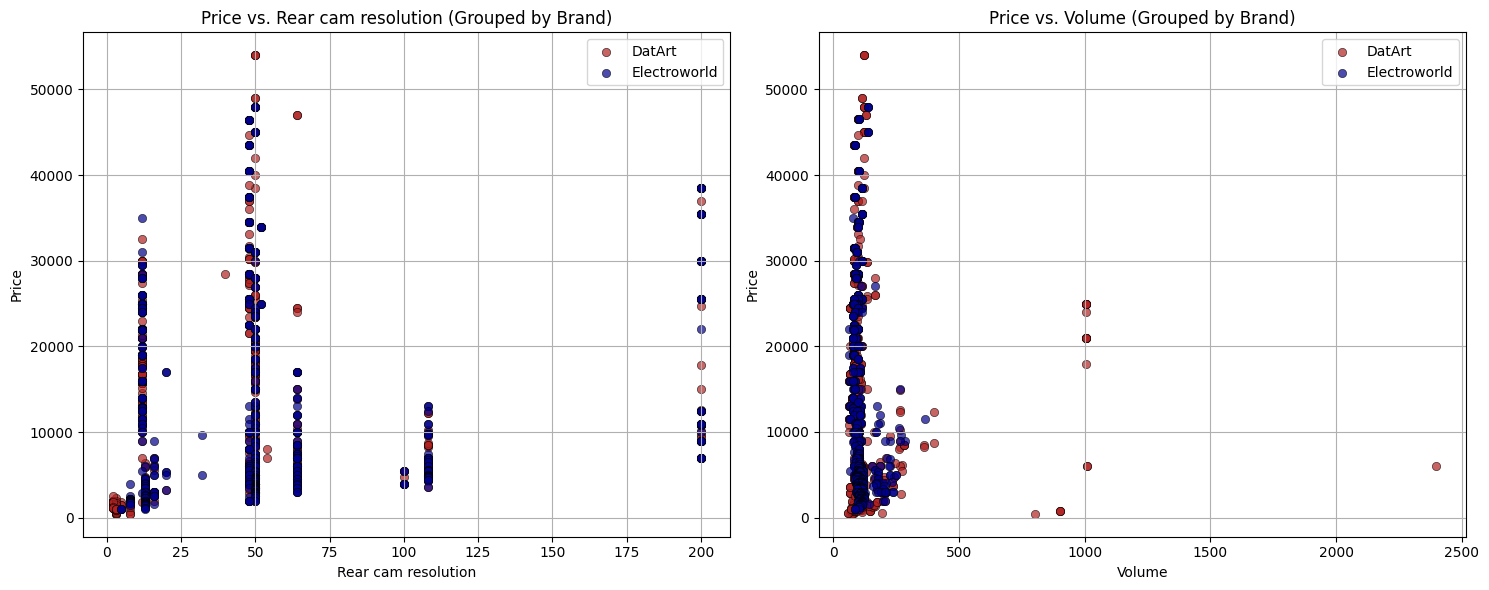

In [697]:
# List of variables to plot
variables_to_plot = ['rear cam resolution', 'volume']
online_retailer = ['DatArt', 'Electroworld']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define colors for each online retailer
retailer_colors = {'DatArt': 'firebrick', 'Electroworld': 'darkblue'}

# Plot scatter plot for each variable
for idx, variable in enumerate(variables_to_plot):
    ax = axes[idx]# Get the current axis
    
    # Plot scatter plot for each online retailer
    for retailer in online_retailer:
        subset_data = data[data['online-retailer'] == retailer]
        ax.scatter(subset_data[variable], subset_data['price'], c=retailer_colors[retailer], label=retailer, alpha=0.7, edgecolors='black', linewidth=0.5)
        
    ax.set_title(f'Price vs. {variable.capitalize()} (Grouped by Brand)')
    ax.set_xlabel(variable.capitalize())
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()

saving_plot("scatter_plots_retailer.png")

plt.show()

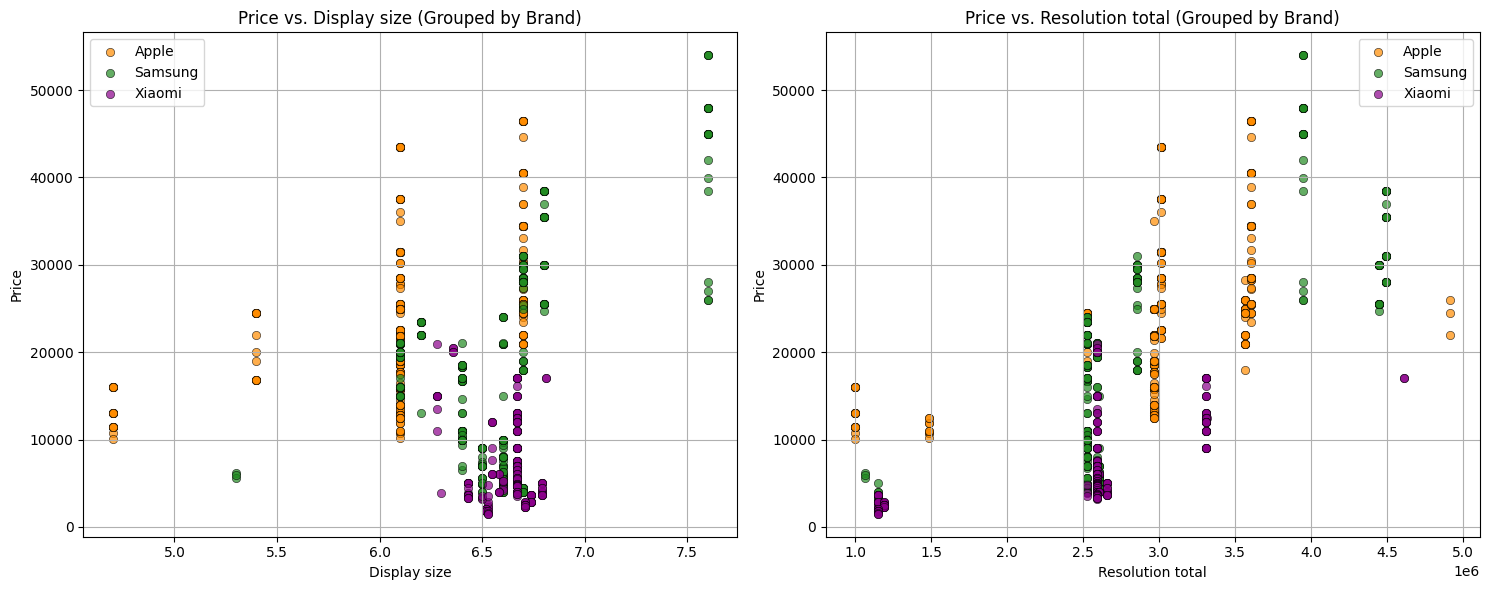

In [698]:
# List of variables to plot
variables_to_plot = ['display size', 'resolution total']
brands = ['Apple', 'Samsung', 'Xiaomi']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define colors for each online retailer
brands_colors = {'Apple': 'darkorange', 'Samsung': 'forestgreen', 'Xiaomi': 'darkmagenta'}

# Plot scatter plot for each variable
for idx, variable in enumerate(variables_to_plot):
    ax = axes[idx]  # Get the current axis
    
    # Plot scatter plot for each online retailer
    for brand in brands:
        subset_data = data[data['brand'] == brand]
        ax.scatter(subset_data[variable], subset_data['price'], c=brands_colors[brand], label=brand, alpha=0.7, edgecolors='black', linewidth=0.5)
        
    ax.set_title(f'Price vs. {variable.capitalize()} (Grouped by Brand)')
    ax.set_xlabel(variable.capitalize())
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()

saving_plot("scatter_plots_brand.png")

plt.show()

Historgram/Density Plot

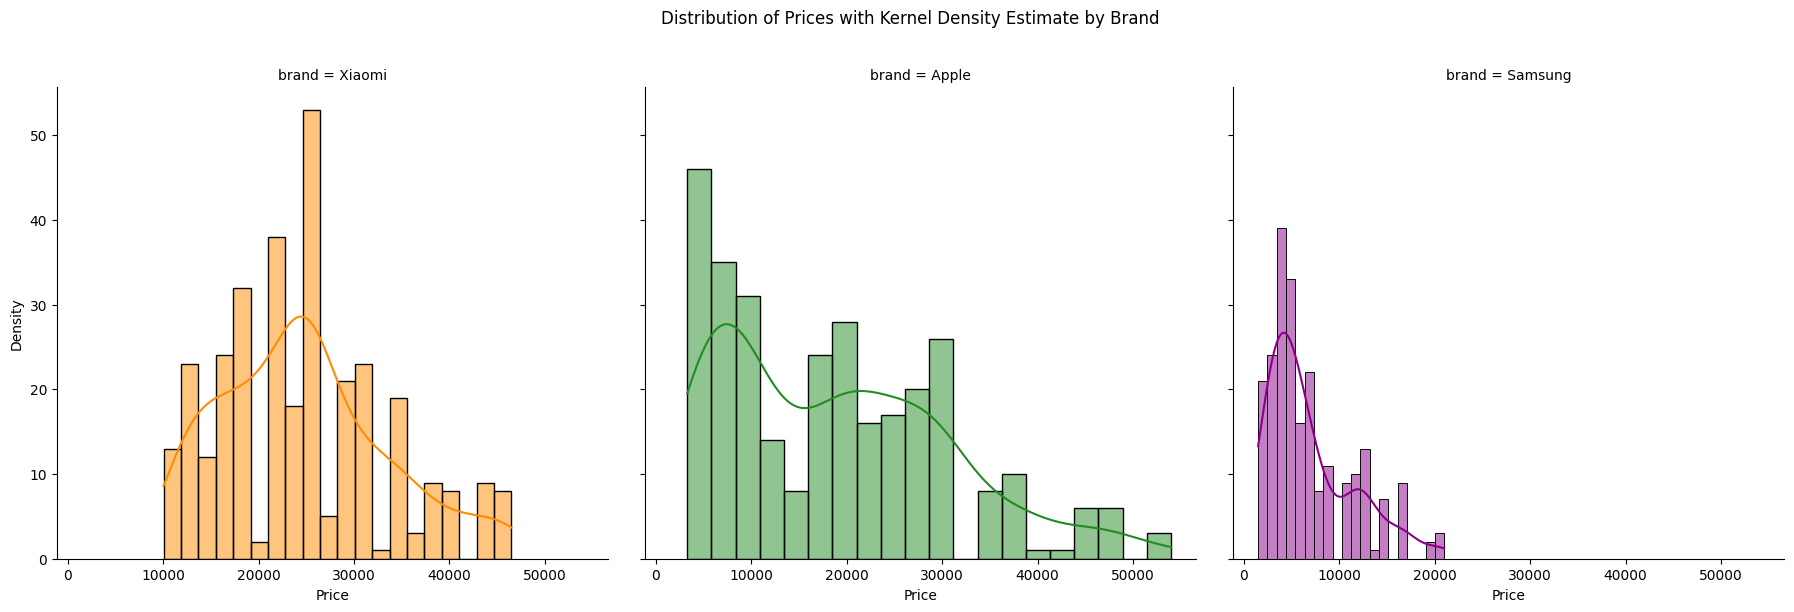

In [643]:
# Set up the FacetGrid
subset_data = data[data['brand'].isin(['Apple', 'Samsung', 'Xiaomi'])]

# Define custom colors for the brands
custom_palette = {'Apple': 'darkorange', 'Samsung': 'forestgreen', 'Xiaomi': 'darkmagenta'}

# Create the FacetGrid with custom palette
g = sns.FacetGrid(subset_data, col='brand', height=6)

# Plot histogram with KDE for each retailer
for brand, ax in zip(['Apple', 'Samsung', 'Xiaomi'], g.axes.flat):
    sns.histplot(subset_data[subset_data['brand'] == brand]['price'], 
                 bins=20, kde=True, edgecolor='black', color=custom_palette[brand], ax=ax)

# Add labels and title
g.set_axis_labels('Price', 'Density')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Prices with Kernel Density Estimate by Brand')

saving_plot("histogram_grouped_brand.png")

plt.show()

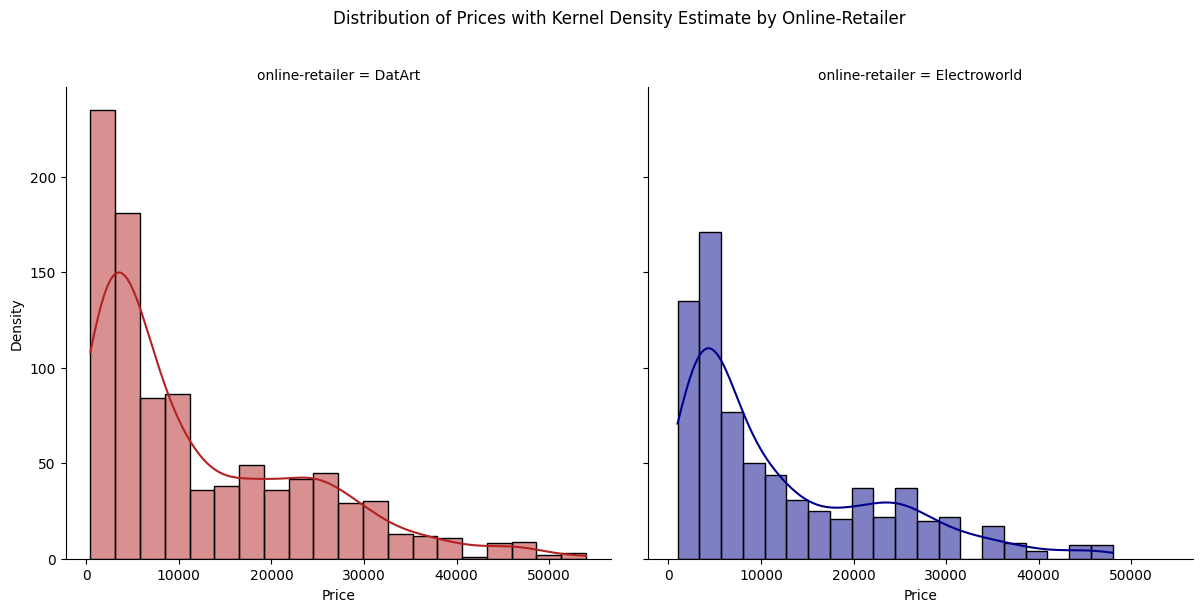

In [644]:
# Set up the FacetGrid
subset_data = data[data['online-retailer'].isin(['DatArt', 'Electroworld'])]

# Define custom colors for the brands
custom_palette = {'DatArt': 'firebrick', 'Electroworld': 'darkblue'}

# Create the FacetGrid with custom palette
g = sns.FacetGrid(subset_data, col='online-retailer', height=6)

# Plot histogram with KDE for each retailer
for online_retailer, ax in zip(['DatArt', 'Electroworld'], g.axes.flat):
    sns.histplot(subset_data[subset_data['online-retailer'] == online_retailer]['price'], 
                 bins=20, kde=True, edgecolor='black', color=custom_palette[online_retailer], ax=ax)

# Add labels and title
g.set_axis_labels('Price', 'Density')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Prices with Kernel Density Estimate by Online-Retailer')

saving_plot("histogram_grouped_retailer.png")

plt.show()

Heatmap

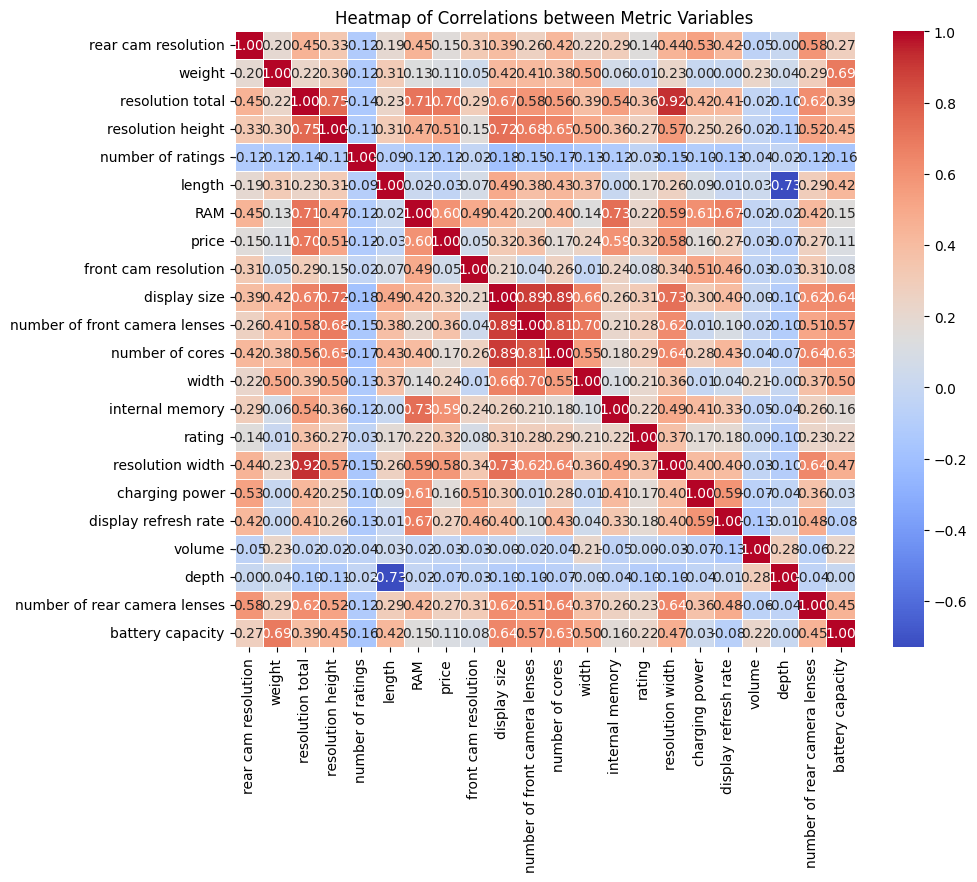

In [645]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlations between Metric Variables')

saving_plot("heatmap_corr.png")

plt.show()

Pre-processing variables for price model application

In [646]:
# Data is prepared for modelling. Categorical variables are One-hot encoded, boolean variables converted to 0/1 variables and NA's removed.
float_variables_to_exclude = ['rating', 'resolution width', 'resolution height']
integer_variables_to_exclude = ['ID', 'number of ratings']
categorical_variables_to_exclude = ['configuration cards', 'title', 'processor model']

model_data = generate_model_dataset(data, integer_variables_to_exclude, float_variables_to_exclude, categorical_variables_to_exclude)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Additive Nature of SHAP values: "For machine learning models this means that SHAP values of all the input features will always sum up to the difference between baseline (expected) model output and the current model output for the prediction being explained".

#### Generalized Additive Regression Model (GAM's) - InterpretMLs explainable boosting machines

Partial dependence plot: Calculation of SHAP Value, as difference between partial dependence plot (at the feature's values) and expected model output (average of predicted prices). 

In [648]:
# Defining modelling variables
y = model_data['price']
# Log-transform the target variable y
y_log = pd.Series(np.log(y), name='log_price')
X = model_data.drop(columns = ['price'])

# Sampling 100 obs for use as the background distribution
X100 = shap.utils.sample(X, 100) 

In [649]:
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y_log)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

PermutationExplainer explainer: 1122it [04:52,  3.74it/s]                          


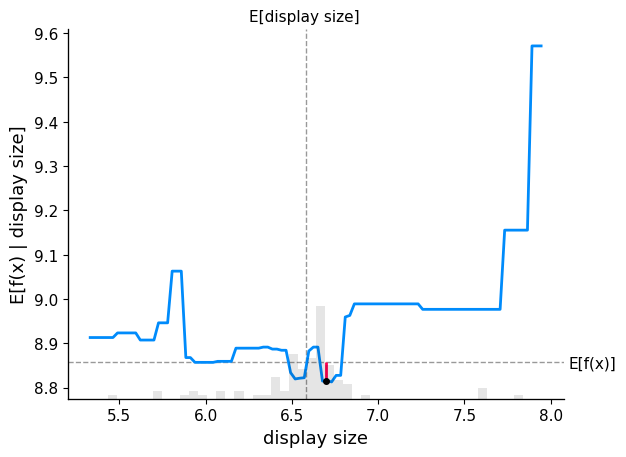

In [671]:
# make a standard partial dependence plot with a single SHAP value overlaid
sample_ind = 60
fig, ax = shap.partial_dependence_plot(
    "display size",
    model_ebm.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_ebm[sample_ind : sample_ind + 1, :],
)

saving_plot("GAM_partial_dep_plot.png")
plt.show()

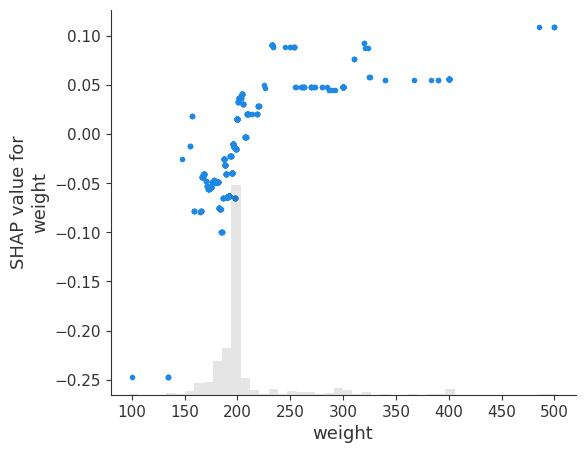

<Figure size 640x480 with 0 Axes>

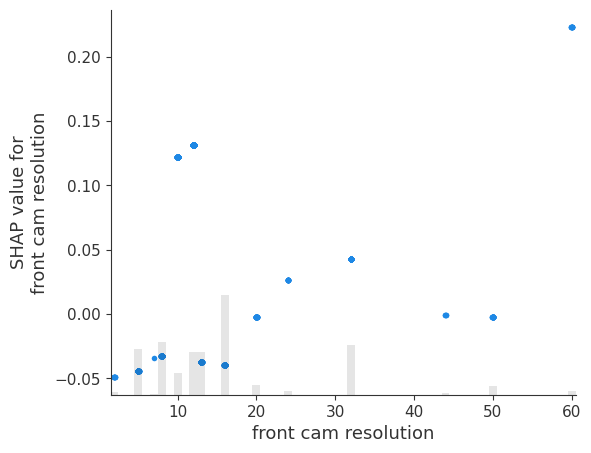

<Figure size 640x480 with 0 Axes>

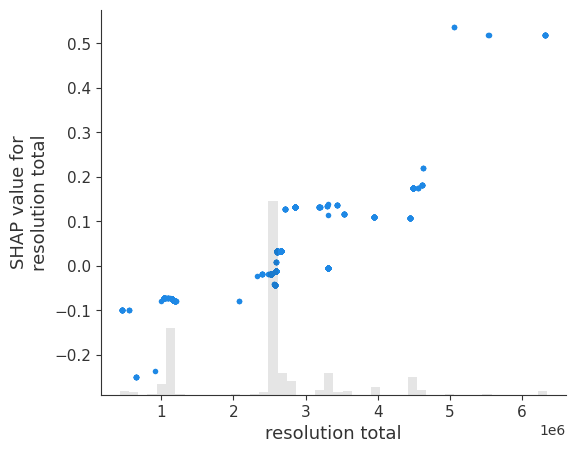

<Figure size 640x480 with 0 Axes>

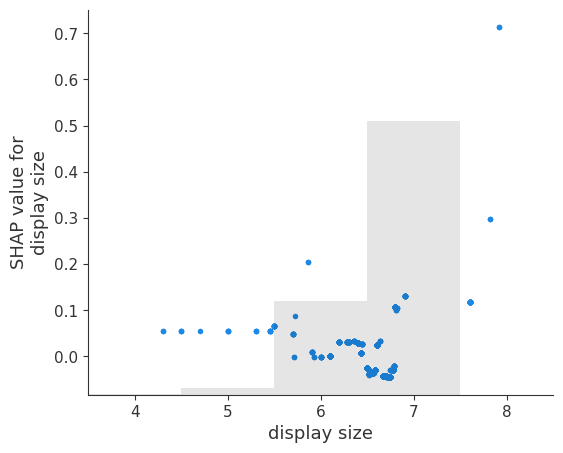

<Figure size 640x480 with 0 Axes>

In [674]:
variables_to_plot = ['weight', 'front cam resolution', 'resolution total', 'display size']

for variable in variables_to_plot:
    shap.plots.scatter(shap_values_ebm[:, variable])
    saving_plot(f"GAM_shap_scatter_plot_{variable}.png")
    plt.show()

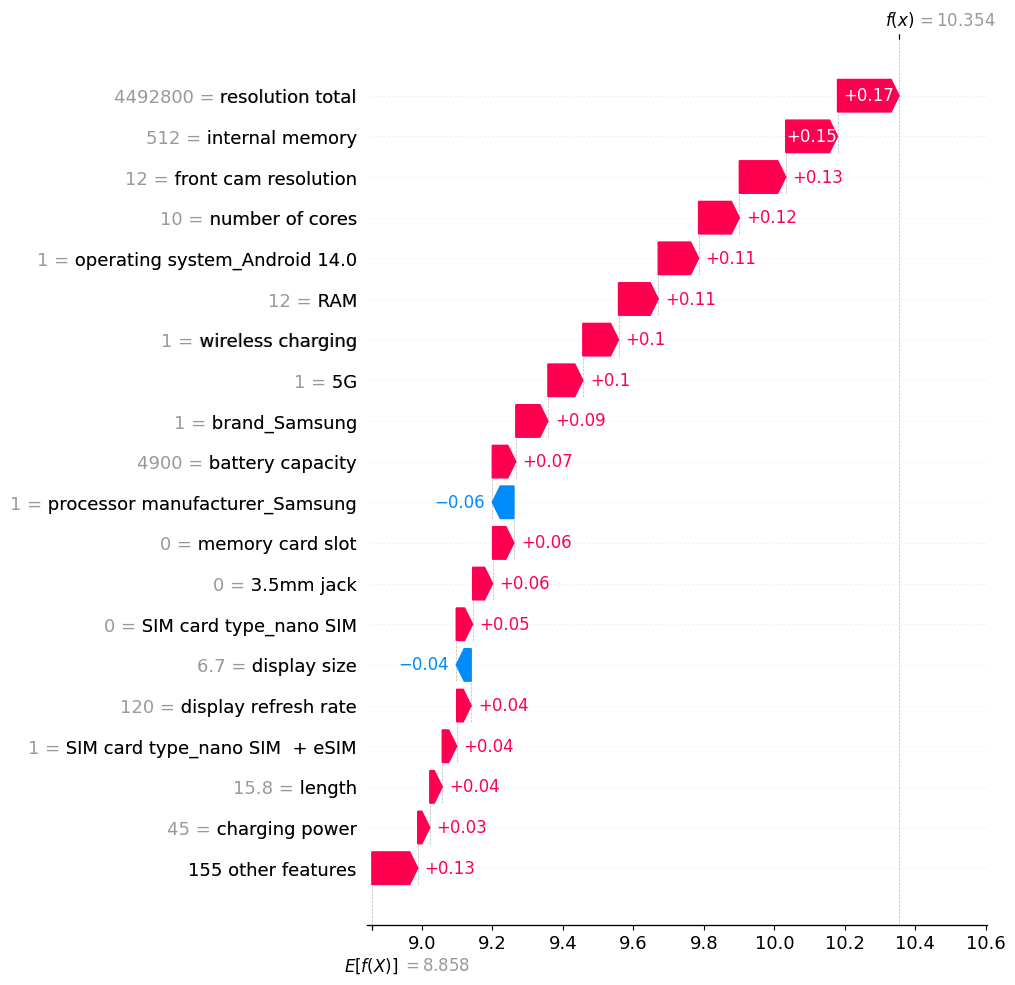

<Figure size 640x480 with 0 Axes>

In [662]:
shap.plots.waterfall(shap_values_ebm[40], max_display=20)
saving_plot("GAM_shap_waterfall_plot.png")

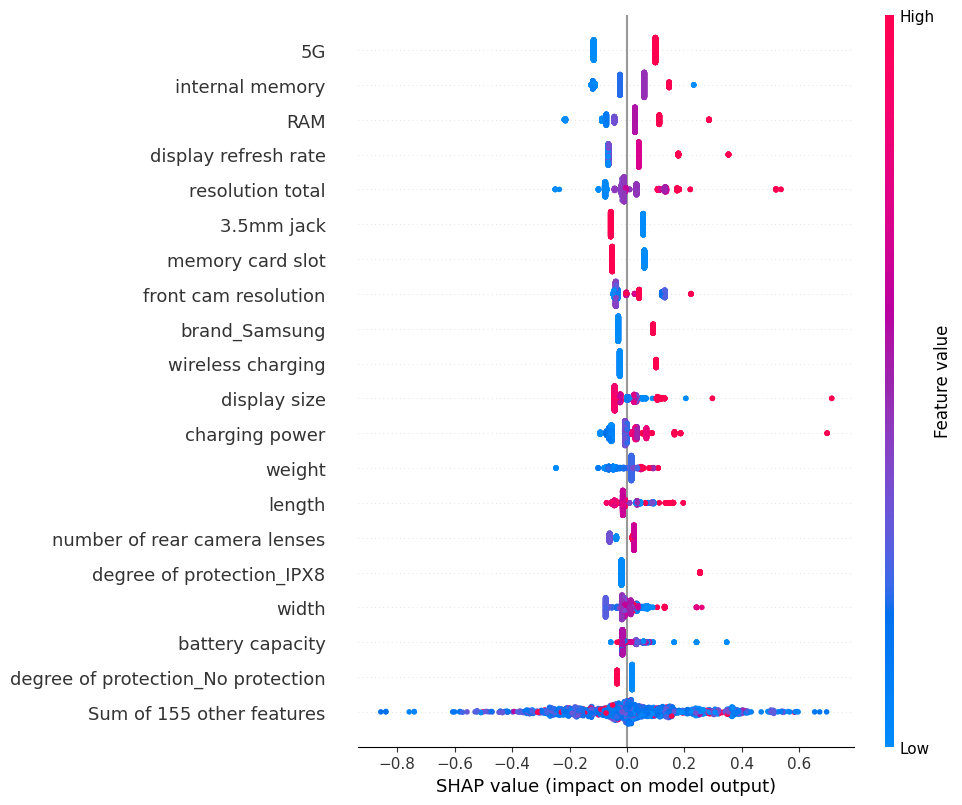

<Figure size 640x480 with 0 Axes>

In [663]:
shap.plots.beeswarm(shap_values_ebm, max_display = 20)
saving_plot("GAM_shap_waterfall_distr_plot")

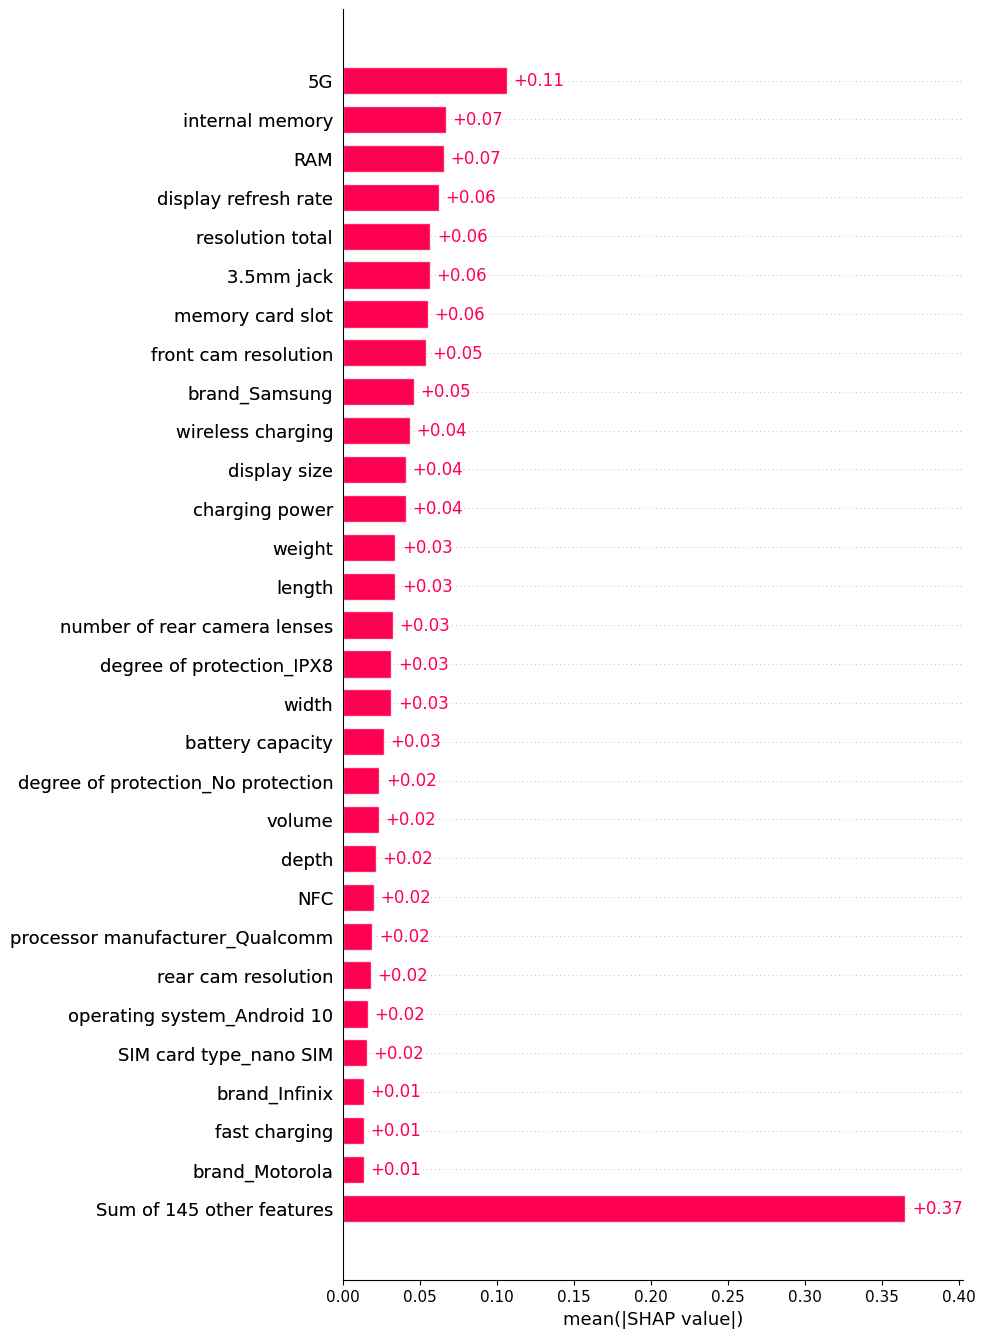

<Figure size 640x480 with 0 Axes>

In [664]:
shap.plots.bar(shap_values_ebm, max_display = 30)
saving_plot("GAM_shap_waterfall_mean_plot")

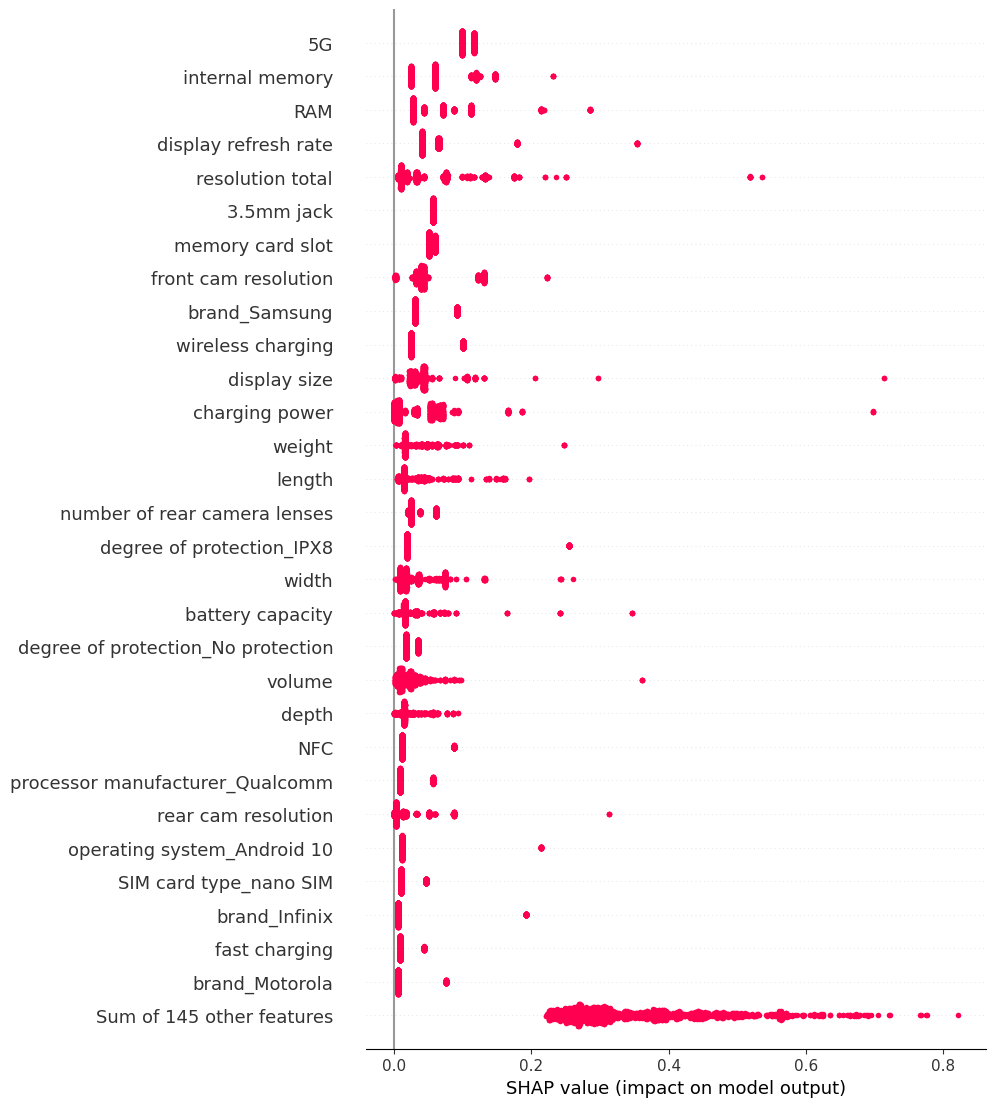

In [614]:
shap.plots.beeswarm(shap_values_ebm.abs, color="shap_red", max_display = 30)
saving_plot("GAM_shap_waterfall_mean_plot")

Non-additive boosted tree-model

In [665]:
model_xgb = xgboost.XGBRegressor(n_estimators=10000, max_depth=2).fit(X, y_log)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100) 
shap_values_xgb = explainer_xgb(X)

 99%|===================| 1111/1121 [02:20<00:01]        

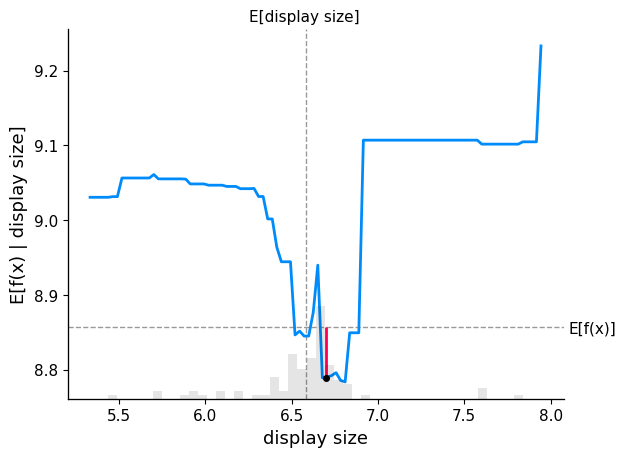

In [672]:
sample_ind = 60
# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "display size",
    model_xgb.predict,
    X100, 
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)

saving_plot("Non_Add_Boosted_Tree_Model_part_dep_plot.png")

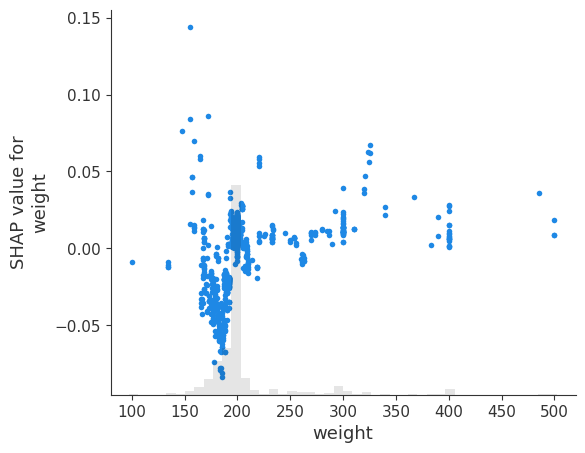

<Figure size 640x480 with 0 Axes>

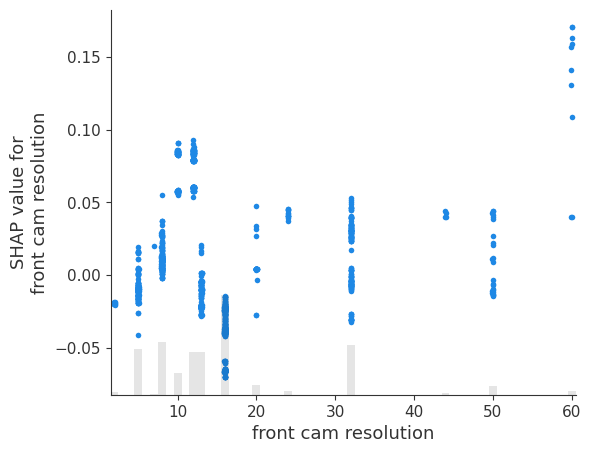

<Figure size 640x480 with 0 Axes>

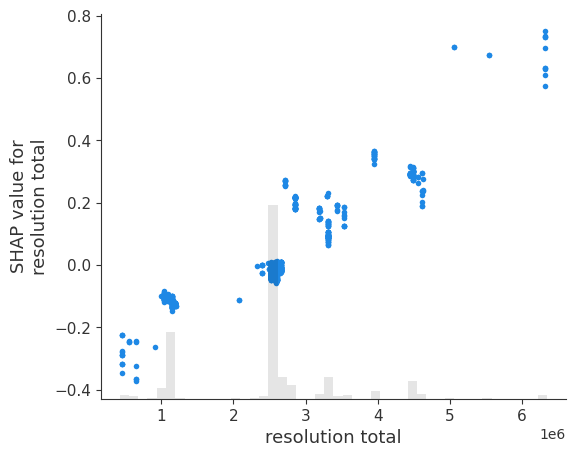

<Figure size 640x480 with 0 Axes>

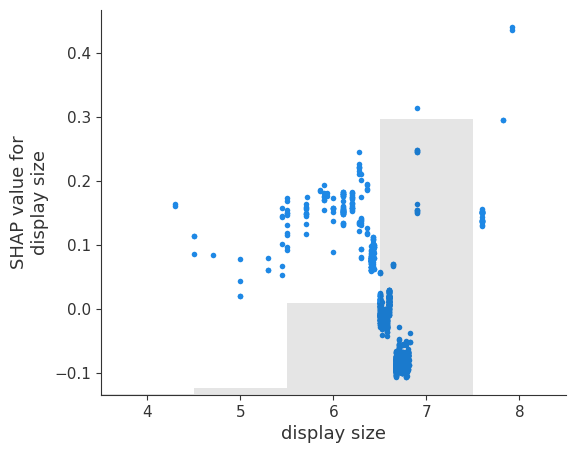

<Figure size 640x480 with 0 Axes>

In [675]:
variables_to_plot = ['weight', 'front cam resolution', 'resolution total', 'display size']

for variable in variables_to_plot:
    shap.plots.scatter(shap_values_xgb[:, variable])
    saving_plot(f"Non_Add_Boosted_Tree_Model_shap_{variable}.png")
    plt.show()

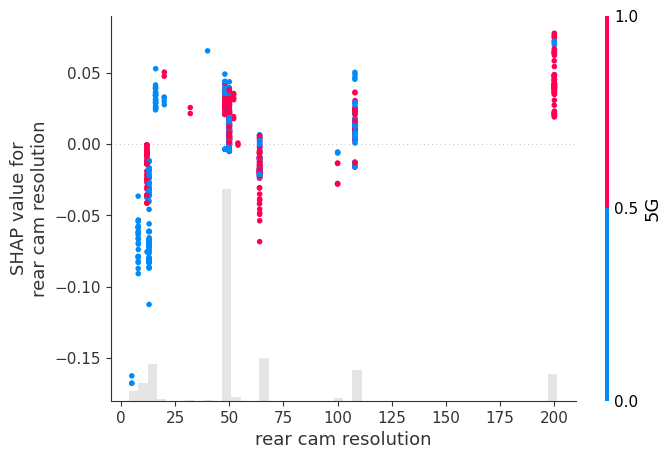

<Figure size 640x480 with 0 Axes>

In [677]:
shap.plots.scatter(shap_values_xgb[:, "rear cam resolution"], shap_values_xgb[:, "5G"])
saving_plot(f"Non_Add_Boosted_Tree_Model_shap_col_plot.png")

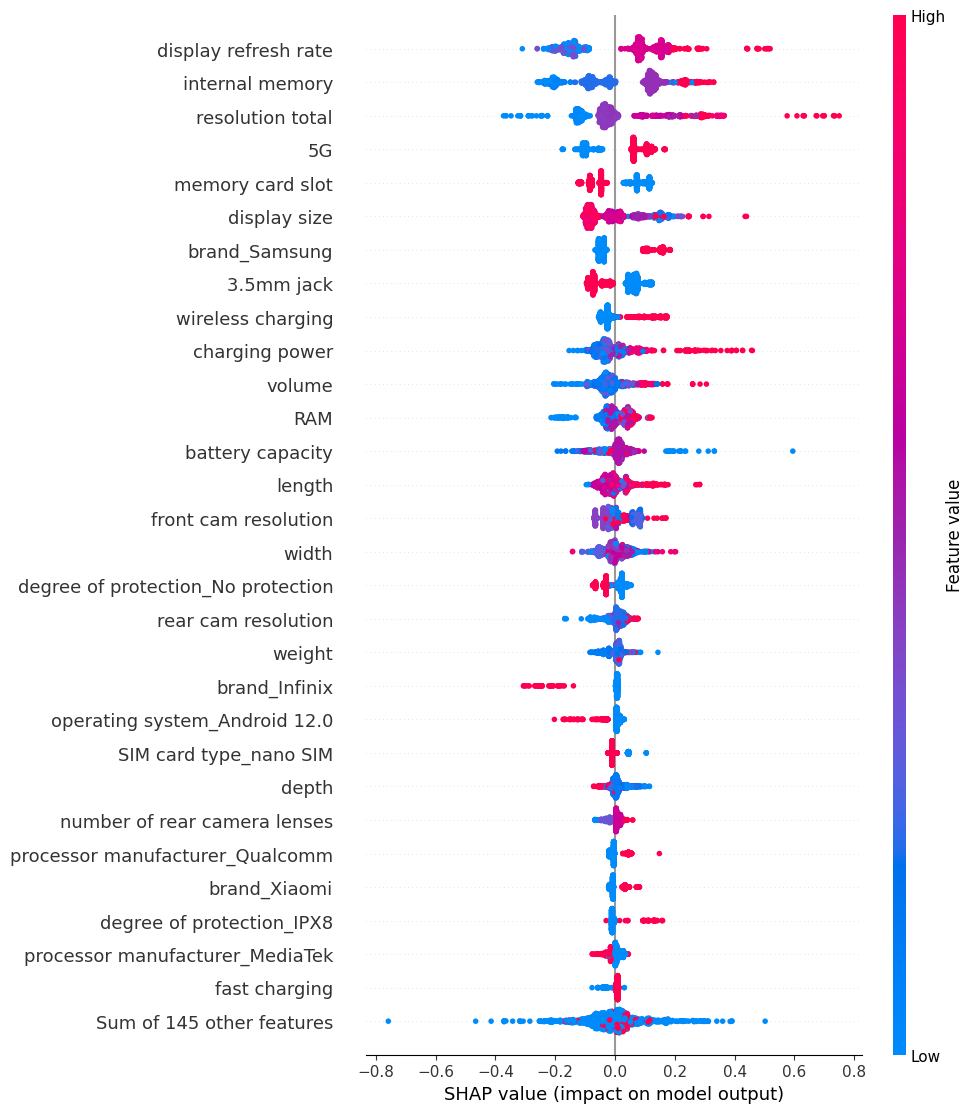

<Figure size 640x480 with 0 Axes>

In [678]:
shap.plots.beeswarm(shap_values_xgb, max_display = 30)
saving_plot(f"Non_Add_Boosted_Tree_Model_shap_waterfall_distr.png")

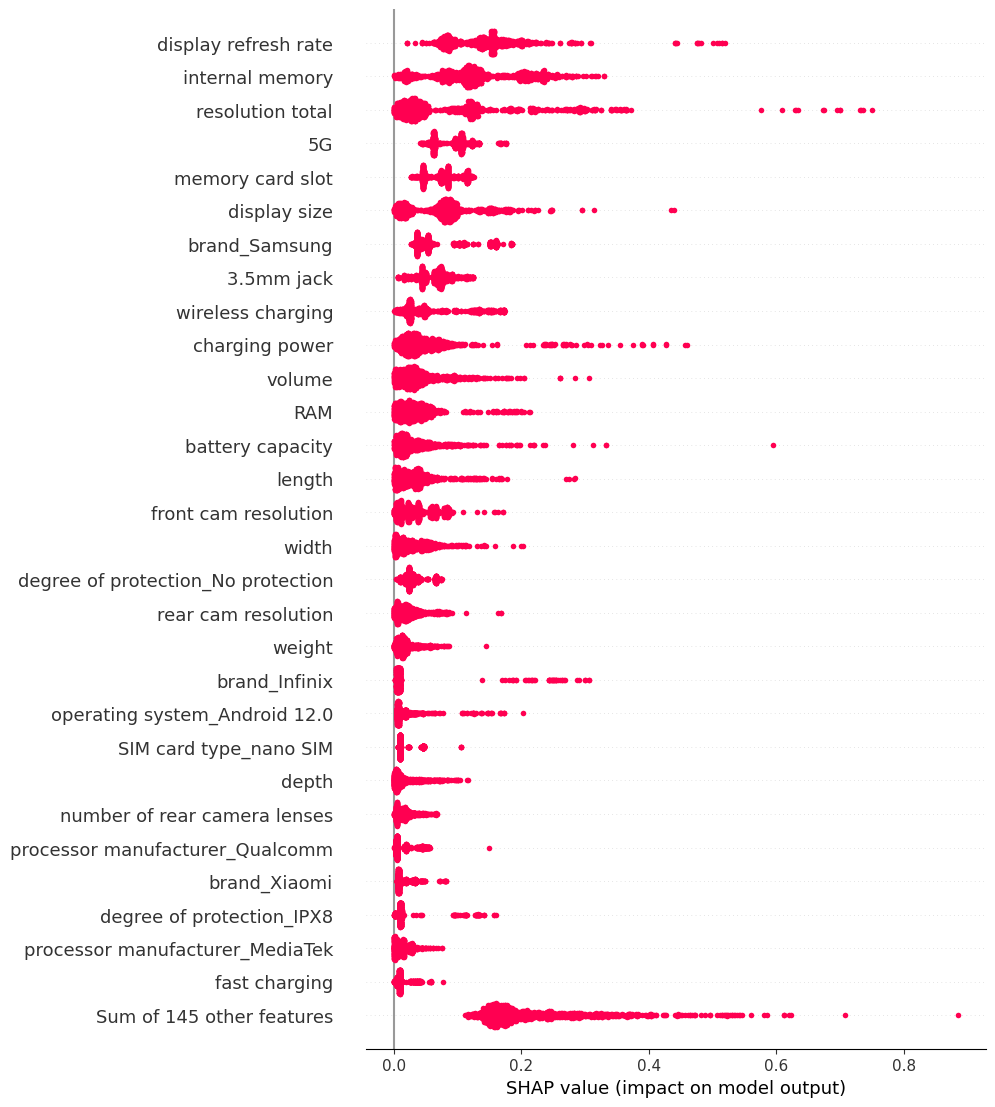

<Figure size 640x480 with 0 Axes>

In [679]:
shap.plots.beeswarm(shap_values_xgb.abs, color="shap_red", max_display = 30)
saving_plot(f"Non_Add_Boosted_Tree_Model_shap_waterfall_abs.png")

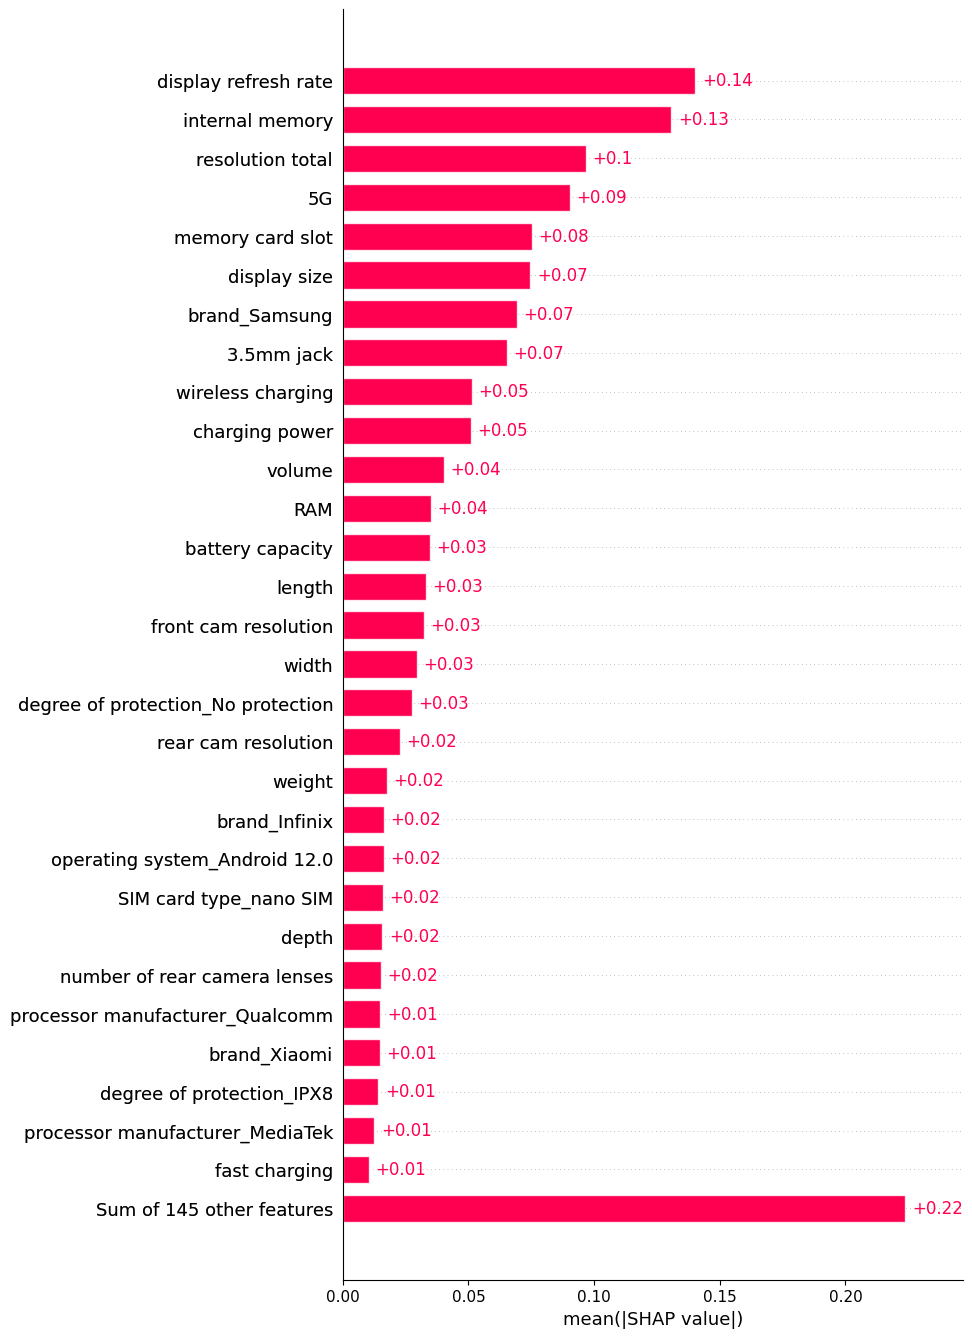

<Figure size 640x480 with 0 Axes>

In [680]:
shap.plots.bar(shap_values_xgb, max_display = 30)
saving_plot(f"Non_Add_Boosted_Tree_Model_shap_waterfall_mean.png")